## Retrieve records directly from CSV File (No SQL included!)

***** Welcome to  MOH Financial Management ******
< 1 >: To view the trend of CPF contributions received with Medisave
< 2 >: To view the trend of Employees Wages
< 3 >: To view the trend on both < 1 > and < 2 >
---------------------------------------------------------------------------------------------
Enter your choice from the above selection:3

Data Info for Trends of CPF Contribution and Wages
-----------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
yr              7 non-null int64
con_received    7 non-null int64
medisave        7 non-null float64
dtypes: float64(1), int64(2)
memory usage: 248.0 bytes
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 30 to 36
Data columns (total 3 columns):
year       7 non-null int64
level_1    7 non-null object
value      7 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22

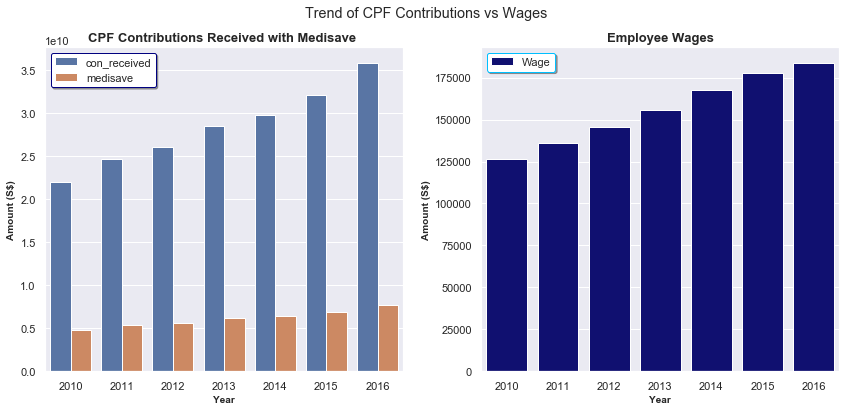

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

################################################### Define Functions #####################################################
def grouped_bar_charts(title, data):
    sns.set(style = "darkgrid", rc = {'figure.figsize': (12,6)})
    ax = sns.barplot(x = 'yr', y = 'Amount', hue = 'variable', data = data)
    ax.set_title(title, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Year", fontsize = 12, fontweight = 'bold')
    ax.set_ylabel("Amount (S$)", fontsize = 12, fontweight = 'bold')
    ax.legend(loc = 'upper left', facecolor = 'white', edgecolor = 'navy', shadow = True)
    plt.show(ax)


def bar_chart(title, data):
    sns.set(style = "darkgrid", rc = {'figure.figsize': (12,6)})
    ax = sns.barplot(x = 'year', y = 'value', data = data, color = 'navy', label = 'Wage')
    ax.set_title(title, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Year", fontsize = 12, fontweight = 'bold')
    ax.set_ylabel("Amount (S$)", fontsize = 12, fontweight = 'bold')
    ax.legend(loc = 'upper left', facecolor = 'white', edgecolor = 'deepskyblue', shadow = True)
    
    plt.show(ax)
    
def subplots_bar_charts(title, title_1, title_2, data_cpf_contribution, data_employees_wages):
    f, axes = plt.subplots(1,2, figsize = (12,6))
    ax1 = sns.barplot(x= 'yr', y = 'Amount', hue = 'variable', data = data_cpf_contribution, ax = axes[0])
    ax1.set_title(title_1, fontsize = 13, fontweight = 'bold')
    ax1.set_xlabel("Year", fontsize = 10, fontweight = 'bold')
    ax1.set_ylabel("Amount (S$)", fontsize = 10, fontweight = 'bold')
    ax1.legend(loc = 'upper left', facecolor = 'white', edgecolor = 'navy', shadow = True)
    
    ax2 = sns.barplot(x = 'year', y = 'value', data = data_employees_wages, color = 'navy', label = 'Wage', ax = axes[1])
    ax2.set_title(title_2, fontsize = 13, fontweight = 'bold')
    ax2.set_xlabel("Year", fontsize = 10, fontweight = 'bold')
    ax2.set_ylabel("Amount (S$)", fontsize = 10, fontweight = 'bold')
    ax2.legend(loc = 'upper left', facecolor = 'white', edgecolor = 'deepskyblue', shadow = True )
    
    plt.suptitle("Trend of CPF Contributions vs Wages")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    plt.show()
    
############################################## Data Analysis #############################################################
filename_1 = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\CPF_contributions_received.csv'
filename_2 = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\Compensation_of_employees_at_current_prices_annual.csv'

cpf_contribution = pd.read_csv(filename_1)
employees_wages = pd.read_csv(filename_2)

### store the data into dataframe object
cpf_contribution_df = pd.DataFrame(cpf_contribution)
employees_wages_df = pd.DataFrame(employees_wages)

print("***** Welcome to  MOH Financial Management ******")
print("==============================================================================================")
print("< 1 >: To view the trend of CPF contributions received with Medisave")
print("< 2 >: To view the trend of Employees Wages")
print("< 3 >: To view the trend on both < 1 > and < 2 >")
print("---------------------------------------------------------------------------------------------")
choice = int(input("Enter your choice from the above selection:"))
print()

if choice == 1:
    title = 'CPF Contributions Received with Medisave '
    
    cpf_contribution_df['medisave'] = cpf_contribution_df['con_received']*(8/37)
    
    print("Data Info for " + title)
    print("-----------------------------------------------------------------------------------------")
    print(cpf_contribution_df.info())
    print()
    
    print("Data for " + title)
    print("-----------------------------------------------------------------------------------------")
    print(cpf_contribution_df)
    print()
    
    print("Basic Descriptive Statistics Summary for " + title)
    print("-----------------------------------------------------------------------------------------")
    print(cpf_contribution_df.iloc[:,1:3].describe())
    print()
    
    print("Graphical Summary for " + title + " :")
    print("-----------------------------------------------------------------------------------------")
    
    copy_cpf_contribution_df = cpf_contribution_df.copy()
    data = pd.melt(copy_cpf_contribution_df, id_vars = 'yr',var_name = 'variable', value_name = 'Amount')
    
    ### call the function to create grouped bar charts
    grouped_bar_charts(title, data)

elif choice == 2:
    title = 'Employee Wages'
    
    deletevalues = employees_wages_df['year'].isin(employees_wages_df['year'].iloc[30:37])
    employees_wages_df = employees_wages_df[deletevalues]
    
    print("Data Info for " + title)
    print("-----------------------------------------------------------------------------------------")
    print(employees_wages_df.info())
    print()
    
    print("Data for " + title + " :")
    print("-----------------------------------------------------------------------------------------")
    print(employees_wages_df)
    print()
    
    print("Basic Descriptive Statistics Summary for " + title)
    print("-----------------------------------------------------------------------------------------")
    print(employees_wages_df['value'].describe())
    print()
    
    print("Graphical Summary for " + title)
    print("-----------------------------------------------------------------------------------------")
    
    copy_employees_wages_df = employees_wages_df.copy()
    data = copy_employees_wages_df
    
    ### call the function to create bar chart
    
    bar_chart(title, data)
    
elif choice == 3:
    title = 'Trends of CPF Contribution and Wages'
    title_1 = 'CPF Contributions Received with Medisave '
    title_2 = 'Employee Wages'
    
    cpf_contribution_df['medisave'] = cpf_contribution_df['con_received']*(8/37)
    deletevalues = employees_wages_df['year'].isin(employees_wages_df['year'].iloc[30:37])
    employees_wages_df = employees_wages_df[deletevalues]
    
    print("Data Info for " + title)
    print("-----------------------------------------------------------------------------------------")
    print(cpf_contribution_df.info())
    print()
    print(employees_wages_df.info())
    print()
    
    print("Data for " + title)
    print("-----------------------------------------------------------------------------------------")
    print(cpf_contribution_df)
    print()
    print(employees_wages_df)
    print()
    
    print("Graphical Summary for " + title)
    print("-----------------------------------------------------------------------------------------")
    
    copy_cpf_contribution = cpf_contribution_df.copy()
    data_cpf_contribution = pd.melt(copy_cpf_contribution, id_vars = 'yr',var_name = 'variable', value_name = 'Amount')
    
    copy_employees_wages_df = employees_wages_df.copy()
    data_employees_wages = copy_employees_wages_df
    
    ### call the function to create subplots on bar charts
    subplots_bar_charts(title, title_1, title_2, data_cpf_contribution, data_employees_wages)